# **Projeto da Disciplina (AP2)**
Gabriel Ferreira de Carvalho - 41806107 <br>
Nathalia do Valle Papst - 31919928

# Compressão de Imagens
A Compressão de Imagens é um forma de diminuir o tamanho de uma imagem, mas, mantendo a sua resolução de uma forma limpa. 


Nesse notebook nós vamos criar um compressor de imagem, usando as bibliotecas Numpy e Pillow, além disso, também usaremos a aprendizagem de máquina com o algoritmo de K-means (K-médias em português).


O K-means é um algoritmo de treinamento não supervisionado, isso é, ele rotula so dados a partir de tentativa e erro.


Bom, mas agora focando no nosso exemplo vamos começar verificando se as bibliotecas necessárias estão instaladas.

In [10]:
import PIL
import numpy

print(f'Versão do PIL/Pillow: {PIL.__version__}')
print(f'Versão do Numpy: {numpy.__version__}')

Versão do PIL/Pillow: 9.1.0
Versão do Numpy: 1.22.3


Caso não tenha instalado, adicione o seguinte código ao terminal do seu computador:

*pip3 install pillow* <br>
*pip3 install numpy*


Após isso, vamos importar as bibliotecas:

In [11]:
import os
import sys

from PIL import Image
import numpy as np

# Implementando o K-means para Compressão de Imagens
O objetivo da compressão de imagens nesse caso é reduzir o número de cores (RGB), pegando a cor média K que é mais parecida com a da imagem original. Isso é feito porque uma imagem com menos cores é uma imagem que ocupa menos espaço no disco.


Nós vamos começar implementando uma função que cria pontos iniciais para as centróides. O input da função é X, que são os exemplos de treinamento, e ela escolhe k pontos diferentes aleatoriamente.

In [12]:
def initialize_K_centroids(X, K):
    """ Escolha K pontos de X aleatoriamente """
    m = len(X)
    return X[np.random.choice(m, K, replace=False), :]

Depois nós implementamos uma função que encontra a centróide mais perto de cada exemplo de treinamento. Nós temos X e as centróides como entrada e retornamos o índice da centróide mais próxima de cada exemplo em c, que é um vetor de tamanho m.

In [13]:
def find_closest_centroids(X, centroids):
    m = len(X)
    c = np.zeros(m)
    for i in range(m):
        # Encontre distâncias
        distances = np.linalg.norm(X[i] - centroids, axis=1)

        # Atribuir cluster mais perto de c[i]
        c[i] = np.argmin(distances)

    return c

Para o próximo passo do algoritmo, nós computamos a distância de cada exemplo à sua centróide, e calculamos a média das distâncias de cada centróide. Por causa do looping que estamos fazendo pelas linhas, temos que transpor os exemplos.

In [14]:
def compute_means(X, idx, K):
    _, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        examples = X[np.where(idx == k)]
        mean = [np.mean(column) for column in examples.T]
        centroids[k] = mean
    return centroids

Por fim, nós definimos o número máximo de iterações para 10. Caso as centróides não estajam mudando mais, podemos retornar o resultado porque não é possível otimizar mais.

In [15]:
def find_k_means(X, K, max_iters=10):
    centroids = initialize_K_centroids(X, K)
    previous_centroids = centroids
    for _ in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_means(X, idx, K)
        if (centroids == previous_centroids).all():
            # As centróides não estão mais mudando de valor.
            return centroids
        else:
            previous_centroids = centroids

    return centroids, idx

# Adicionando a Imagem
Nós vamos tentar adicionar a imagem usando a biblioteca Pillow, da seguinte forma:

In [16]:
try:
    image_path = "Josh.png"
    assert os.path.isfile(image_path)
except (IndexError, AssertionError):
    print('Por favor especifique uma imagem')

O Pillow nos da um objeto Imagem, mas o nosso algoritmo precisa de um vetor NumPy. Para isso, vmaos definir uma função para ajudar a converter.

In [17]:
def load_image(path):
    """ Carregue a imagem do caminho. Retorne um vetor numpy. """
    image = Image.open(path)
    return np.asarray(image) / 255

Agora, nós vamos usar essa função da seguinte forma:

In [18]:
image = load_image(image_path)
w, h, d = image.shape
print('Imagem encontrada com largura: {}, altura: {}, profundidade: {}'.format(w, h, d))

Imagem encontrada com largura: 304, altura: 200, profundidade: 4


Depois, nós pegamos a nossa matriz de recursos X. Nós vamos remodelar a imagem porque cada pixel tem o mesmo significado (cor), assim eles não precisam ser apresentados como uma grade (grid).

In [20]:
X = image.reshape((w * h, d))
K = 20 # O número de cores desejado na imagem comprimida

Por fim, nós podemos usar o nosso algoritmo e pegar as K cores. Essas cores serão escolhidas pelo algoritmo.

In [21]:
colors, _ = find_k_means(X, K, 20)

Pelos índices retornados pela função find_k_means estarem uma iteração para trás das cores, nós computamos os índices com a cor atual. Cada índice tem um valor de 0 até K, correspondendo à sua cor.

In [22]:
idx = find_closest_centroids(X, colors)

Depois de termos todos os dados necessários, nós reconstruiremos a imagem substituíndo o índice da cor com a cor e remodelando a imagem para suas dimensões originais. Então, usando a função Image.fromarray do Pillow, nós convertemos os números crus de volta em uma imagem.

In [23]:
idx = np.array(idx, dtype=np.uint8)
X_reconstructed = np.array(colors[idx, :] * 255, dtype=np.uint8).reshape((w, h, d))
compressed_image = Image.fromarray(X_reconstructed)

Concluíndo, nós salvamos a imagem de volta no disco da seguinte forma:

In [24]:
compressed_image.save('out.png')

# Testando a Imagem


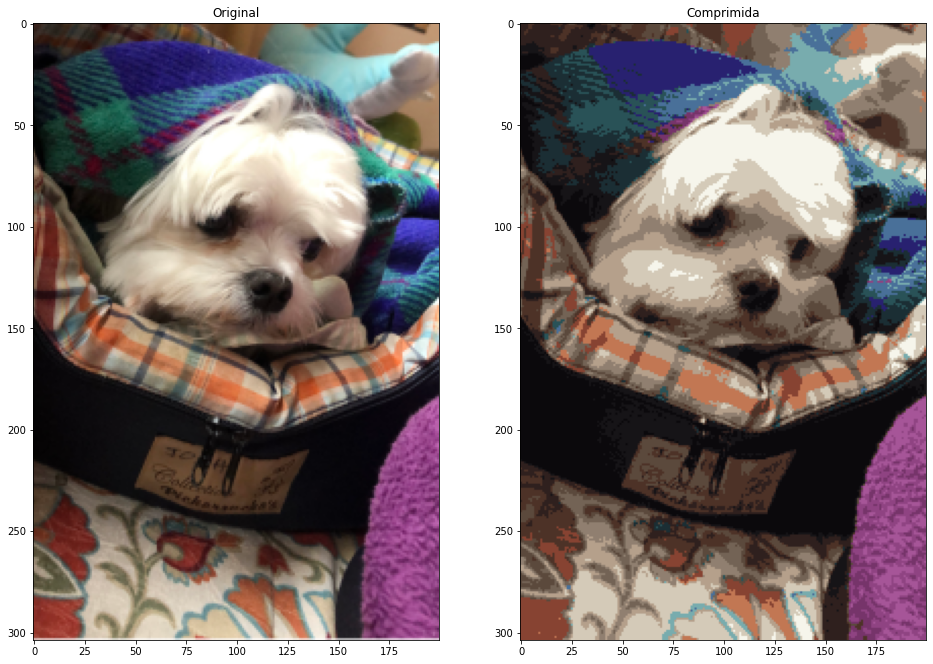

In [25]:
import matplotlib.pyplot as plt

original_image = Image.open(image_path)

fig, axs = plt.subplots(1, 2, figsize=(16, 16))
axs[0].set_title('Original')
axs[0].imshow(original_image, cmap=plt.cm.gray)
axs[1].set_title('Comprimida')
axs[1].imshow(compressed_image, cmap=plt.cm.gray)
plt.show()